<a href="https://colab.research.google.com/github/u-adrian/PSDA/blob/main/01_Exercise/Aufgabe_5_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Aufgabe 5: Interpretation von Modellen

a) Lesen Sie den Datensatz Hdma.csv ein und machen Sie sich mit den Daten vertraut.

In [2]:
import pandas as pd
import os


In [3]:
DATA_PATH = "/content/drive/MyDrive/PDSA/ÜB1/dataset"

In [4]:
df = pd.read_csv(os.path.join(DATA_PATH,"Hdma.csv"),sep=';')

In [5]:
df.head()

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,condo,black,deny
0,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


###Variable Description and More Evident Renaming


| Original Variable     | Description | New Variable |
| ----------- | ----------- | ----------- |
| dir     | debt payments to total income ratio      | debt_payments_to_total_income_ratio      |
| hir   | housing expenses to income ratio        | housing_expenses_to_income_ratio      |
| lvr      | ratio of size of loan to assessed value of property      | size_of_loan_to_assessed_value_of_property_ratio      |
| ccs   | consumer credit score from 1 to 6 (a low value being a good score)        | consumer_credit_score      |
| mcs      | mortgage credit score from 1 to 4 (a low value being a good score)      | mortgage_credit_score_from      |
| pbcr   | public bad credit record?        | public_bad_credit_record      |
| dmi   | denied mortgage insurance ?       | denied_mortgage_insurance      |
| self      | self employed?       | self_employed      |
| single   | is the applicant single?      | single      |
| uria      | 1989 Massachusetts unemployment rate in the applicant’s industry       | unemployment_rate_in_the_applicant’s_industry      |
| condominium   | is unit a condominium?        | condominium      |
| black      | is the applicant black?       | black      |
| deny   | mortgage application denied?        | deny      |

In [6]:
new_column_names = ["_".join("debt payments to total income ratio".split()),
"_".join("housing expenses to income ratio".split()),
 "_".join("size of loan to assessed value of property ratio".split()),
 "_".join("consumer credit score".split()),
 "_".join("mortgage credit score".split()),
 "_".join("public bad credit record".split()),
 "_".join("denied mortgage insurance".split()),
 "_".join("self employed".split()),
 "_".join("single".split()),
 "_".join("unemployment rate in the applicant’s industry".split()),
 "_".join("condominium".split()),
 "_".join("black".split()),
 "_".join("deny".split())]


df.columns = new_column_names

In [7]:
df.head()

,debt_payments_to_total_income_ratio,housing_expenses_to_income_ratio,size_of_loan_to_assessed_value_of_property_ratio,consumer_credit_score,mortgage_credit_score,public_bad_credit_record,denied_mortgage_insurance,self_employed,single,unemployment_rate_in_the_applicant’s_industry,condominium,black,deny
0,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 13 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   debt_payments_to_total_income_ratio               2381 non-null   float64
 1   housing_expenses_to_income_ratio                  2381 non-null   float64
 2   size_of_loan_to_assessed_value_of_property_ratio  2381 non-null   float64
 3   consumer_credit_score                             2381 non-null   float64
 4   mortgage_credit_score                             2381 non-null   float64
 5   public_bad_credit_record                          2380 non-null   object 
 6   denied_mortgage_insurance                         2381 non-null   object 
 7   self_employed                                     2380 non-null   object 
 8   single                                            2381 non-null   object 
 9   unemployment_rate_i

In [9]:
df.describe()

,debt_payments_to_total_income_ratio,housing_expenses_to_income_ratio,size_of_loan_to_assessed_value_of_property_ratio,consumer_credit_score,mortgage_credit_score,unemployment_rate_in_the_applicant’s_industry,condominium
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,0.330814,0.255346,0.737760,2.116387,1.721008,3.774496,0.288114
std,0.107235,0.096635,0.178715,1.666370,0.537169,2.026636,0.452980
min,0.000000,0.000000,0.020000,1.000000,1.000000,1.800000,0.000000
25%,0.280000,0.214000,0.652850,1.000000,1.000000,3.100000,0.000000
50%,0.330000,0.260000,0.779412,1.000000,2.000000,3.200000,0.000000
75%,0.370000,0.298800,0.868421,2.000000,2.000000,3.900000,1.000000
max,3.000000,3.000000,1.950000,6.000000,4.000000,10.600000,1.000000


b) Volkswirtschaftler möchten herausfinden, was die möglichen Einflussfaktoren auf die
Ablehnung eines Kreditantrags sind, und ob es eine rassistische Diskriminierung gibt. Welcher Typ von Aufgabe des maschinellen Lernens ist für diese Aufgabe geeignet? Welche
Methoden kann man benutzen?

**Antwort:** 
Grundsätzlich kann die Aufgabe der Feature Selection im Maschninellen Lernen Auskunft darüber geben wie groß der Einflussfaktor einzelner Features auf die Target Variable ist. Zum Beispiel eignen sich die Klassen im [sklearn.feature_selection](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection) Modul um disen Zusammenhang zu untersuchen. Eine Methode um hiermit den Zusammenhang zwischen Featuren und der Target Variable zu untersuchen ist die Nutzung von statistischen Tests. Die Art des anzuwendenden statistischen Tests richtet sich nach dem Datentyp (categorical, ordinal und numeric) des Features (siehe Aufgabe 4). 

Eine weitere Methode ist pandas interne DataFrame.corr() Funktion mit der man die paarweise Korrelation zwischen Spalten bestimmen kann. Diese wird typischerweise ebenfalls im Feature Selection Prozess angewendet. Die gewünschte Korrelationsmethode (Pearson, Spearman, Kendalls Tau) kann hierbei gewählt werden.

Eine weitere Methode findet sich in der Betrachtung von Decision Tree Algorithmen. Hierbei kann das Auswahlkriterium zur Aufteilung der Daten (z.B. der Information Gain) eines Features genutzt werden um Aussagen über den Einfluss dieses Features auf die Target Variable zu machen. Decision Trees sind nämlich genau nach dem Prinzip aufgebaut, dass die Features mit dem größten Einfluss näher an der Wurzel lokalisiert sind. Beispielsweise kann man in sklearn über das feature_importances_ Attribut eines Entscheidungsbaum auf diese Größe zugreifen. 



Mit den oben vorgestellten Methoden kann der Zusammenhang zwischen dem Feature **black** und dem Target **deny** ermittelt werden. Daraus kann man ableiten ob eine rassistische Diskrimierung vorliegt.


In die Kontextsensitive Systeme Vorlesun reingucken!

Furthermore, impurity-based feature importance for trees are strongly biased and favor high cardinality features (typically numerical features) over low cardinality features such as binary features or categorical variables with a small number of possible categories.

Ggf. noch Permutation Feature Importance aus Sklearn mitaufnehmen: https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-importance

c) Ist Datenvorverarbeitung nötig? Warum? Falls nötig, verarbeiten Sie die Daten vor.

**Antwort:** <br> Für einige der statistischen Tests, für die DataFrame.corr() Funktion und viele der ALG in Teilaufgabe f) ist es notwendig die nominalen Daten mit den Ausprägungen "yes" und "no" in numerische Daten ("0" bzw. "1") umzuwandeln. Dies trifft auf folgende Features zu: **public_bad_credit_record, denied_mortgage_insurance, self_employed, single, unemployment_rate_in_the_applicant’s_industry, black**. Und das Target: **deny**.

In der obigen Ausgabe von df.info() haben wir gesehen, dass es zwei Attribute mit einer NaN Ausprägung gibt. Die zugehörigen Beobachtungen werden wir aus dem Datensatz löschen, da diese in ML Algorithmen Probleme verursachen können.


Muss man für die Anwendung von Decision Trees, die Daten in Intervalle einteilen?

Feaute Importance is misleading for features that have many unique values! https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html Therefore we need Data Preparation

In [10]:
#Transformieren von nominalen Daten in numerische Daten

yes_no_to_int = {"yes": 1, "no": 0}

for column in df.columns:
 if df[column].dtype == "object":
    df[column] = df[column].map(yes_no_to_int)


In [11]:
#Beobachtung mit NaN Ausprägung ausfindig machen und aus dem Datensatz löschen
import numpy as np
df[df.isin([np.nan]).any(1)]
df = df.dropna()

In [12]:
df.describe()

,debt_payments_to_total_income_ratio,housing_expenses_to_income_ratio,size_of_loan_to_assessed_value_of_property_ratio,consumer_credit_score,mortgage_credit_score,public_bad_credit_record,denied_mortgage_insurance,self_employed,single,unemployment_rate_in_the_applicant’s_industry,condominium,black,deny
count,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000
mean,0.330814,0.255346,0.737776,2.116387,1.721008,0.073529,0.020168,0.116387,0.393277,3.774496,0.288235,0.142437,0.119748
std,0.107257,0.096656,0.178751,1.666721,0.537282,0.261058,0.140604,0.320755,0.488580,2.027062,0.453036,0.349571,0.324735
min,0.000000,0.000000,0.020000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.800000,0.000000,0.000000,0.000000
25%,0.280000,0.214000,0.652681,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.100000,0.000000,0.000000,0.000000
50%,0.330000,0.260000,0.779536,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.200000,0.000000,0.000000,0.000000
75%,0.370000,0.298825,0.868459,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,3.900000,1.000000,0.000000,0.000000
max,3.000000,3.000000,1.950000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,10.600000,1.000000,1.000000,1.000000


In [13]:
#Daten standardisieren
# ist eigentlich nicht sinnvoll..


from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
data_standardized = standard_scaler.fit_transform(df)
df_standardized = pd.DataFrame(data_standardized)


d) Separieren Sie die Daten in 80% : 20% = Training : Test Datensatz. Führen Sie eine logistische 
Regression durch. Beschreiben Sie Koeffizienten und deren Signifikanzniveau sowie die Area 
Under Curve (AUC) der Receiver-Operator-Curve (ROC). Interpretieren Sie die Ergebnisse.

In [14]:
#Daten in Feature und Target separieren

X = df.iloc[:, :-1]
y = df.iloc[:, -1]



In [15]:
# Aufteilen der Daten in einen Trainings- und einen Testdatensatz

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0 )


In [16]:
# Benutzung von Phyton's statsmodels Modul um eine logistische Regression durchzuführen und statistische Metriken auszugeben
import statsmodels.api as sm
log_regressor_statsmodels = sm.Logit(y_train, sm.add_constant(X_train)).fit()


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.264514
         Iterations 7


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [17]:
#Darstellung der Parameter des logistischen Regressionsmodell und zugehörigen Signifikanzwerten in einem DataFrame
log_regressor_statsmodels_ergebnis_html = log_regressor_statsmodels.summary().tables[1].as_html()
log_regressor_ergebnis_statsmodels = pd.read_html(log_regressor_statsmodels_ergebnis_html, header=0, index_col=0)

#Entfernen der nicht relevanten Spalten
log_regressor_ergebnis_statsmodels = log_regressor_ergebnis_statsmodels[0].drop(columns=["z","[0.025","0.975]"])
 

#Koeffizienten sortieren in absteigender Reinfolge
log_regressor_ergebnis_statsmodels = log_regressor_ergebnis_statsmodels.sort_values(by="coef", ascending=False)

log_regressor_ergebnis_statsmodels

,coef,std err,P>|z|
debt_payments_to_total_income_ratio,4.7401,1.138,0.000
denied_mortgage_insurance,4.2555,0.563,0.000
size_of_loan_to_assessed_value_of_property_ratio,1.5538,0.541,0.004
public_bad_credit_record,1.3706,0.238,0.000
black,0.8590,0.202,0.000
self_employed,0.4202,0.252,0.096
single,0.3722,0.176,0.035
consumer_credit_score,0.2832,0.044,0.000
mortgage_credit_score,0.2644,0.162,0.103
unemployment_rate_in_the_applicant’s_industry,0.0481,0.039,0.220


### Koeffizienten im logistischen Regressionsmodell
Die Spalte **coef** der log_regressor.summary() Ausgabe stellt die Koeffizienten des logistischen Regressionsmodells dar. Um die Koeffizienten zu verstehen betrachten wir zunächst ein vereinfachtes logistische Regressionsmodell, welches nur die Attribute **single** und **black** betrachtet: <br><br> $logit(p)=0.4170*single+0.7478*black+const$,  mit $p = P(Y=1)$ aka der Wahrscheinlichkeit, dass der Kreditantrag abgelehnt wird. 

Auf der linken Seite der Gleichung haben wir $logit(p)$, weswegen die Koeffizienten der Attribute nicht intuitiv intepretiert werden können. Die Gleichungen werden wir im Folgenden soweit umformen, dass auf der linken Seite nur noch die Wahrscheinlichkeit p stehen wird ([Wer an einer Erläuterung der einzelnen Schritte interessiert ist kann sie hier nachlesen](https://stats.oarc.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/)).

1. $logit(p) = ln(\frac{p}{1-p})= 0.4170*single+0.7478*black+const$

2. $\frac{p}{1-p} = exp (0.4170*single+0.7478*black+const)$

3. $p = \frac{exp (0.4170*single+0.7478*black+const)}{1+exp (0.4170*single+0.7478*black+const}$


Angenommen für eine Beobachtung hat das Attribut **single** den Wert 1, **black** hat den Wert 0 und die Konstante hat ebenfalls den Wert 0. Dann beträgt die Wahrscheinlichkeit für eine Kreditablehnung $p=\frac{exp(0.417)}{1+exp(0.417)}=0.6$. Das heißt in diesem vereinfachten Fall erhöht die Eigenschaft das jemand single ist die Wahrscheinlichkeit für die Kreditablehnung von 0% auf 60%.

Die Funktion $p=\frac{exp(x)}{1+exp(x)}$ ist streng monoton steigend, weswegen man ableiten kann das Attribute mit positiven Koeffizienten positv mit der Kreditablehnungswahrscheinlichkeit p korrelieren (siehe Abbildung 1). Für Attribute mit negativen Vorzeichen verhält es sich genau andersherum. 



####Abbildung 1: Logistische Funktion
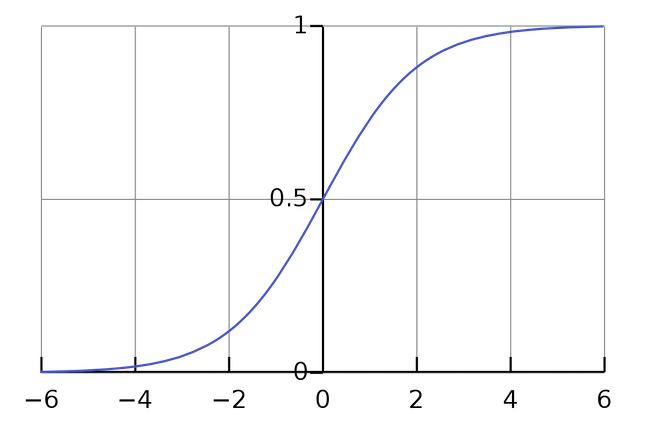

[Bilquelle](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1200px-Logistic-curve.svg.png)


### Signifikanzniveau im logistischen Regressionsmodell
Die Einschätzung der Signifikanz der ermittelten Koeffizienten der Attribute des logistischen Regressionsmodels kann mit Hilfe des p-Wertes erfolgen, welcher einem Hypothesentest zur Grund liegt.
Das Modul statsmodels ermöglicht es uns für jeden ermittelten Koeffizienten einen Z-Hypothesentest durchzuführen, mit dem getestet wird mit welcher Sicherheit der Koeffizient ungleich 0 ist. Genauer gesagt ist die H0: coef==0, die H1: coef!=0.
Die Spalte  **P>|z|** stellt den Signifikanzwert(p-Wert) dar, welcher beschreibt in wie weit die Nullhypothese H0 glaubwürdig ist. Ein niedriger p-Wert bedeutet, dass die Nullhypothese H0 zu gunsten der Alternativhypothese H1 verworfen werden kann. Welcher p-Wert hierfür genau gewählt wird ist Kontext abhänig. Generell folgt, dass je niedriger der p-Wert ist, desto sicherer ist die Alternativhypohtese und demnach die Güte des ermittelten Koeffizienten. In unserem Kontext kann zu dem folgende Interpreation gemacht werden: betrachtet man den p-Wert von dem Attribut **single** mit **P>|z|=0.016**, dann kan daraus schließen, dass es eine 1.6% Chance gibt, dass das Attribut **single** keinen Einfluss auf unser target **deny** hat [(Quelle für diese Interpretation)](https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a). 


In [39]:
#nochmaliges darstellen der Parameter der logistischen Regression, damit weniger Scrollarbeit nötig ist
log_regressor_ergebnis_statsmodels

,coef,std err,P>|z|
debt_payments_to_total_income_ratio,4.7401,1.138,0.000
denied_mortgage_insurance,4.2555,0.563,0.000
size_of_loan_to_assessed_value_of_property_ratio,1.5538,0.541,0.004
public_bad_credit_record,1.3706,0.238,0.000
black,0.8590,0.202,0.000
self_employed,0.4202,0.252,0.096
single,0.3722,0.176,0.035
consumer_credit_score,0.2832,0.044,0.000
mortgage_credit_score,0.2644,0.162,0.103
unemployment_rate_in_the_applicant’s_industry,0.0481,0.039,0.220



###Beschreibung und Interpretation der ermittelten Koeffizienten und deren Signifikanzniveaus
Alle Koeffizienten der Attribute haben ein positives Vorzeichen, daher ist jedes Attribut positiv mit der Kreditablehnung korreliert. Den Einfluss, den ein Attribut auf die Kreditablehnungswahrscheinlichkeit p haben kann ist allerdings nicht nur durch die Größe des Koeffizienten bestimmt, sondern auch durch die möglichen Ausprägungen des Attributs selbst. Das Attribut **denied_mortage_insurance** hat zwar einen Koeffizienten von 4.2408, seine Ausprägungen können aber nur die Werte 0 oder 1 annehmen. Das Attribut **debt_payments_to_total_income_ratio** hat einen klein wenig geringen Koeffizienten von 4.1928, seine Ausprägungen sind aber prinzipiell nach oben hin unbeschränkt (in den Daten finden wir einen Maximalwert von 3.0). Das Attribut **black** hat einen Koeffizienten von 0.8590 und kann die Ausprägungen 0 und 1 annehmen. Der Einfluss des Attributs **black** auf die Kreditablehnungswahrscheinlichkeit p ist gering. Dies wird klar wenn man die  Kreditablehnungswahrscheinlichkeit p, wie im Abschnitt **Koeffizienten im logistischen Regressionsmodell** darestellt und auf das vollständige Modell erweitert. 

$p = \frac{exp (4.7401*debt\_payments\_to\_total\_income\_ratio+...+0.8590*black+...-6.9694)}{1+exp (4.7401*debt\_payments\_to\_total\_income\_ratio+...+0.8590*black+...-6.9694)}$

Wenn der Term $x$ im Inneren von $exp(x)$ negativ ist, dann ist die Krediablehnungswahrscheinlichkeit unter 50% (siehe oben Abbildung 1). Die Konstante in diesem Term beträgt -6.9694. Von daher hat die Erhöhung des Terms um 0.8590 durch die Ausprägung 1 des Attributs **black** nur einen minimalen Einfluss. 

Betrachten wir nun die Signifkanz von den Attributen: Hierbei fallen nur ein paar Attribute durch ihren hohen p-Wert auf (Annahme eines maximalen p-Wertes von 0.1):

| Attribut    | coef| P>&#124;z&#124; |
| ----------- | ----------- | ----------- | 
| housing_expenses_to_income_ratio    | 0.4760 | 0.729 |
| mortgage_credit_score  | 0.1589        | 0.326 |
| condominium | 0.0435        | 0.817 |


In der tatsächlichen Optimierung und Anwendung eines ML Klassifikators würde man diese Attribute entfernen.












In [19]:
#Nochmalige Durchführung einer logistischen Regression mit sklearn um mit sklearn.metrics die Area Under Curve (AUC) der Receiver-Operator-Curve (ROC) darzustellen

from sklearn.linear_model import LogisticRegression
log_regressor = LogisticRegression(C=1e8, class_weight="balanced")           # scikit-learn's logistic regression performs regularization by default. In order to get the same coefficents as in the statsmodel we can negate this by setting the C parameter to a very high number (taken from https://www.reddit.com/r/datascience/comments/8kne2r/different_coefficients_scikitlearn_vs_statsmodels/dz90uen/) 
log_regressor.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=100000000.0, class_weight='balanced')

In [20]:
log_regressor.coef_

array([[ 5.12429811, -0.75047521,  1.37249567,  0.29559667,  0.21095364,
         1.31067114,  4.32417475,  0.38353647,  0.48489014,  0.05728216,
         0.01375989,  0.90449619]])

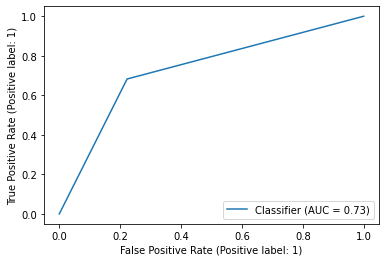

In [21]:
# Vorhersage der Test Daten mittels dem logistischen Regressionsmodell und Darstellung der AUC der ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

y_predict = log_regressor.predict(X_test)
log_roc_auc = roc_auc_score(y_test, y_predict)
RocCurveDisplay.from_predictions(y_test, y_predict)

### Beschreiben und Interpretation der ermittelten Area Under Curve (AUC) der Receiver-Operator-Curve (ROC) 
Die AUC der ROC kann Werte zwischen 0.5 bis 1 annehmen. Erhält ein Klassifizierungsmodell einen Wert von 0.5 dann ist seine Klassifierung nicht besser als der Zufall (blaue Linie im obigen Bild würde der Gerade mit TPR=FPR entsprechen). Umso näher der Wert in Richtung 1 liegt desto trenngenauer kann der Klassifizierer die Klassen separieren. Der in unserem Modell vorliegende AUC Wert der ROC beträgt 0.68. Das zeigt, dass unser Logistisches Regressionsmodell eher schlecht zwischen den Klassen Kreditablehnung und Kreditannahme separieren kann. Gute Werte beginnen ab ca. 0.8 [Quelle](http://gim.unmc.edu/dxtests/RoC3.htm).

Vlt. noch genauer auf den Verlauf der ROC eingehen. Am Anfang steiler Ansteig -> FN können gut rausgefiltert werden

e) Manche Methoden in scikit-learn haben den Parameter class_weight. Wann sollte man class_weight = 'balanced' setzen? Ist es in dieser Aufgabe nötig?

- Es ist Teil guter Daten Analyse Praxis sich die Klassenverteilung des Targets anzuschauen (wurde daher eigentlich schon in Teilaufgabe a) gemacht, wurde jetzt aber weil hier explizit gefragt wurde hier hin verschoben)
- wichtig um den richtigen ALG und ggf. weitere Daten Preprocessing Schritte anzuwenden
-der Parameter class_weight = "balance" sollte gesetzt werden wenn die Klassverteilung des Targets Stark von einer Gleichverteilung abweicht. In unserem Beispiel trifft dies zu (siehe Histogramm). Wir haben mehr als 2000 Kreditannahmen und nur ca. 250 Kreditablehnungen
- ausgehend von dieser Quelle noch ein wenig weiter ausführen (https://stackoverflow.com/questions/30972029/how-does-the-class-weight-parameter-in-scikit-learn-work)
- eigentlich nochmal die Logistische Regression mit class_weight balance durchführen! Problem ist das statsmodel auch die selbige class_weight balancen muss wie sklearn. Die Koeffizienten verändern sich! Und die AUC wird besser!
- hier könnte man noch die Perfomranz zeigen von der logistischen Regression ohne class_weight balance

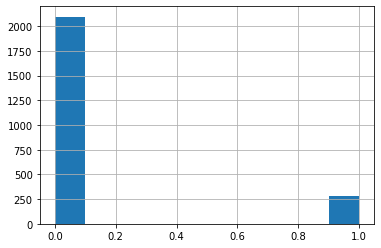

In [22]:
y.hist()

In [23]:
#count_zero= 0
#count_one = 0

#if y[x] == 0:
 # count_zero += 1
#if y[x] == 1:
 # count_one += 1

#print("0:", count_zero, "1:", count_one)

NameError: ignored

e) Führen Sie die Klassifizierung anhand der unten genannten Methoden durch (ohne Optimierung der Parameter). Vergleichen Sie die Feature Importance von Decision Tree, Random Forest und AdaBoost mit der der logistischen Regression aus 4d). Sind Feature Importance, Koffizienten und log der Wahrscheinlichkeit eines Features einer Klasse (feature_log_prob_) direkt vergleichbar? Warum? Sagen Sie vorher, ob ein Kreditantrag im Test-Datensatz abgelehnt wird. Berechnen Sie die AUC der ROC. Beschreiben Sie Ihre Erkenntnisse.

i. Baseline: Häufigste Klasse <br>
ii. Decision Tree (criterion = 'entropy')<br>
iii. Random Forest<br>
iv. AdaBoost<br>
v. Naive Bayes (bei scikit-learn, bitte ComplementNB()benutzen)<br>
vi. SVM (lineare Kernel)<br>

Random Forests und der nicht parametrisierte AdaBoost ALG in sklearn beruhen im Kern auf Decision Tree Algorithmen. Daher kann man wie in Teilaufgabe b) beschrieben die Feature Importance bei diesen drei ALG mit dem Attribut feature_importances_ aus den Modellen ausgeben lassen. 


### Decision Tree
array([0.19241344, 0.15832002, 0.21128136, 0.09119073, 0.04931418,
       0.0408455 , 0.11565025, 0.0164895 , 0.01200884, 0.06527398,
       0.02690759, 0.02030461])

### Random Forest
array([0.19620193, 0.1647678 , 0.19300114, 0.09185705, 0.03389089,
       0.05307506, 0.08754554, 0.0137193 , 0.02601838, 0.08083466,
       0.02663576, 0.0324525 ])

### AdaBoost
array([0.2 , 0.16, 0.42, 0.06, 0.02, 0.02, 0.04, 0.  , 0.02, 0.04, 0.  ,
       0.02])


Feature Importance bei Random Forest und Decision Tree ist ziemlich ähnlich. Bei AdaBoost mehr Varianz in den Feature Importances. Vlt. erklärbar, da AdaBoost speziell die schwierigeren Klassifikationsbeobachtungen verstärkt. Das Attribut **black** hat bei AdaBoost z.B. einen Koeffizienten von 0 bekommen.

Die Wichtigkeit der Attribute bei der logistischen Regression wird durch die Größe der Koeffizienten des logistischen Regressionsmodell dargestellt. Der Vergleich mit dem feature_importances_ Attribut der Decision Tree ALG kann demanch nicht mit dem selben Maßstab erfolgen. Der Vergleich der relativen Wichtigkeit der Attribute ist allerdings möglich. (Um die Koeffizienten besser einschätzen zu können den exp wählen)?. 

### Koeffizienten Logistische Regression
array([[ 5.12429811, -0.75047521,  1.37249567,  0.29559667,  0.21095364,
         1.31067114,  4.32417475,  0.38353647,  0.48489014,  0.05728216,
         0.01375989,  0.90449619]])

Die relative Wichtigkeit der einzelenen Attribute ist unterschiedlich zwischen der logistischen Regression und den Decision Tree ALG. Beispielweise hat das Attribut **size_of_loan_to_assessed_value_of_property_ratio** die höchste Wichtigkeit unter den Decision Tree ALG hat allerdings nur die dritt höchste Wichtigkeit im Logistischen Regressionsmodell.


Die Wichtigkeit der Feautres im Naive Bayes ALG kann mit feature_log_prob_ Attribut der Klasse in sklearn bestimmt werden. 


Feautre Importance, Koeffizienten und log der Wahrscheinlichkeit eines Features vergleichen (Naive Bayes)

## i. Baseline: Häufigste Klasse

Die am häufigsten vorkommende Klasse der Target Variable **deny** ist 0 (siehe Histogram). Noch den relativen Anteil der Klasse ausrechnen (ca 90/10 Verhältniss), d.h. 90% Wahrscheinlichkeit für eine Kreditannahme. Den Klassifier noch implementieren

##ii. DecisionTree

In [24]:
from sklearn.tree import DecisionTreeClassifier
decisiontree_classifier = DecisionTreeClassifier()
decisiontree_classifier.fit(X_train, y_train)


DecisionTreeClassifier()

In [25]:
decisiontree_classifier.feature_importances_

array([0.19241344, 0.15832002, 0.21128136, 0.09119073, 0.04931418,
       0.0408455 , 0.11565025, 0.0164895 , 0.01200884, 0.06527398,
       0.02690759, 0.02030461])

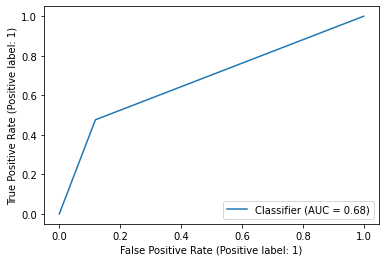

In [26]:
# Vorhersage der Test Daten mittels Decision Tree und Darstellung der AUC der ROC (ggf. eine Funktion schreiben um das für alle auszutestenden ALG zu implementieren)


y_predict_dt = decisiontree_classifier.predict(X_test)
dt_roc_auc = roc_auc_score(y_test, y_predict_dt)
RocCurveDisplay.from_predictions(y_test, y_predict_dt)

## iii. Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier = RandomForestClassifier()
randomforest_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
randomforest_classifier.feature_importances_

array([0.19620193, 0.1647678 , 0.19300114, 0.09185705, 0.03389089,
       0.05307506, 0.08754554, 0.0137193 , 0.02601838, 0.08083466,
       0.02663576, 0.0324525 ])

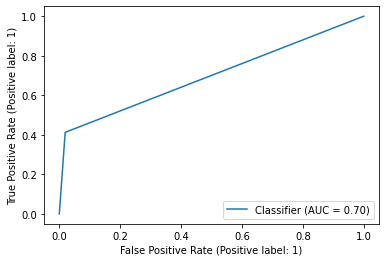

In [29]:
# Vorhersage der Test Daten mittels RandomForest und Darstellung der AUC der ROC (ggf. eine Funktion schreiben um das für alle auszutestenden ALG zu implementieren)


y_predict_rf = randomforest_classifier.predict(X_test)
rf_roc_auc = roc_auc_score(y_test, y_predict_rf)
RocCurveDisplay.from_predictions(y_test, y_predict_rf)

## iv. AdaBoost

In [30]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier()
adaboost_classifier.fit(X_train, y_train)

AdaBoostClassifier()

In [38]:
adaboost_classifier.feature_importances_

array([0.2 , 0.16, 0.42, 0.06, 0.02, 0.02, 0.04, 0.  , 0.02, 0.04, 0.  ,
       0.02])

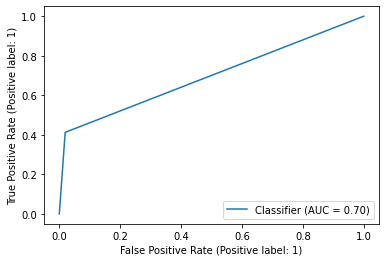

In [31]:
# Vorhersage der Test Daten mittels AdaBoost und Darstellung der AUC der ROC (ggf. eine Funktion schreiben um das für alle auszutestenden ALG zu implementieren)


y_predict_ab = adaboost_classifier.predict(X_test)
ab_roc_auc = roc_auc_score(y_test, y_predict_ab)
RocCurveDisplay.from_predictions(y_test, y_predict_ab)

## v. Naive Bayes (bei scikit-learn, bitte ComplementNB()benutzen)

In [32]:
from sklearn.naive_bayes import ComplementNB
naivebayes_classifier = ComplementNB()
naivebayes_classifier.fit(X_train, y_train)

ComplementNB()

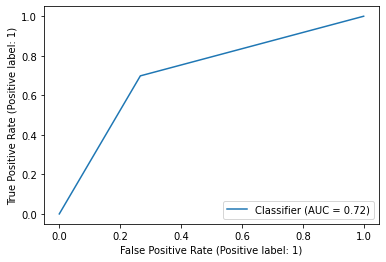

In [33]:
# Vorhersage der Test Daten mittels NaiveBayes und Darstellung der AUC der ROC (ggf. eine Funktion schreiben um das für alle auszutestenden ALG zu implementieren)


y_predict_nb = naivebayes_classifier.predict(X_test)
ab_roc_auc = roc_auc_score(y_test, y_predict_nb)
RocCurveDisplay.from_predictions(y_test, y_predict_nb)

In [34]:
naivebayes_classifier.feature_log_prob_
#wieso zwei Zeilen Ausgabe?

array([[3.43757056, 3.72308402, 2.71025882, 1.33622531, 1.87522182,
        3.89012484, 4.389116  , 4.44974062, 3.22412864, 1.13000187,
        3.61141143, 3.62501709],
       [3.39402125, 3.64474123, 2.58050186, 1.59874087, 1.73533131,
        5.48781601, 8.08307072, 4.46676195, 3.23104045, 0.94177808,
        3.52709077, 4.48302248]])

## vi. SVM (linearer Kernel)

In [35]:
from sklearn.svm import LinearSVC
svm_classifier = LinearSVC(class_weight ="balanced")
svm_classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(class_weight='balanced')

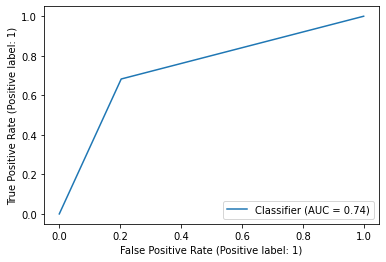

In [36]:
# Vorhersage der Test Daten mittels SVM mit linearem Kernel und Darstellung der AUC der ROC (ggf. eine Funktion schreiben um das für alle auszutestenden ALG zu implementieren)


y_predict_svm = svm_classifier.predict(X_test)
ab_roc_auc = roc_auc_score(y_test, y_predict_svm)
RocCurveDisplay.from_predictions(y_test, y_predict_svm)

### Für Folien
unser Modell perfomrt schlecht weil nicht auf class_imbalance eingegangen wurde, von einem schlecht performenden Modell ausgehend können auch keine validen Schlüsse auf Feature Importances gezogen werden

Performance von Logit wird besser durch class_weight balance

Decision Tree und Random Forest schlechter um ca. 0.05 AUC Punkte

AdaBosst hat kein class_weight Attribut

Naive Bayes ComplementNB ist speziell für Imbalanced Data ausgelegt

SVM verbessert sich mit class_weight balanced um 0.10 AUC Punkte